# 데이터 불러오기

In [7]:
import pandas as pd
df=pd.read_excel('C:/Users/PythonData/Purchases.xlsx')

# 데이터 분석

## 1. 제품별 판매 성과 분석

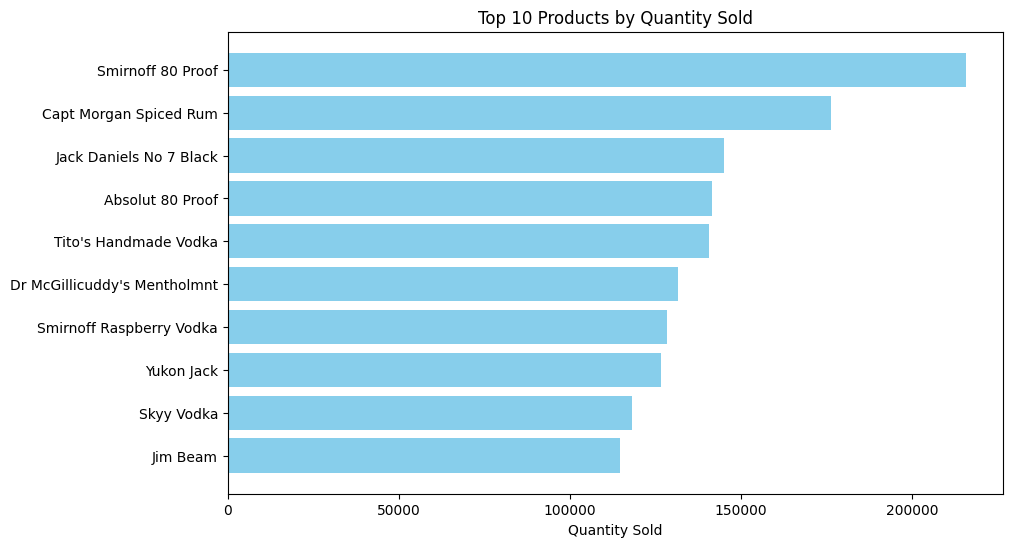

In [8]:
import matplotlib.pyplot as plt

# 제품별 판매량과 매출액을 그룹화하여 합계를 계산
product_sales = df.groupby('Description').agg({'Quantity': 'sum', 'Dollars': 'sum'}).reset_index()

# 판매량 기준으로 상위 10개 제품 시각화
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

## 2. 매장별 성과 분석

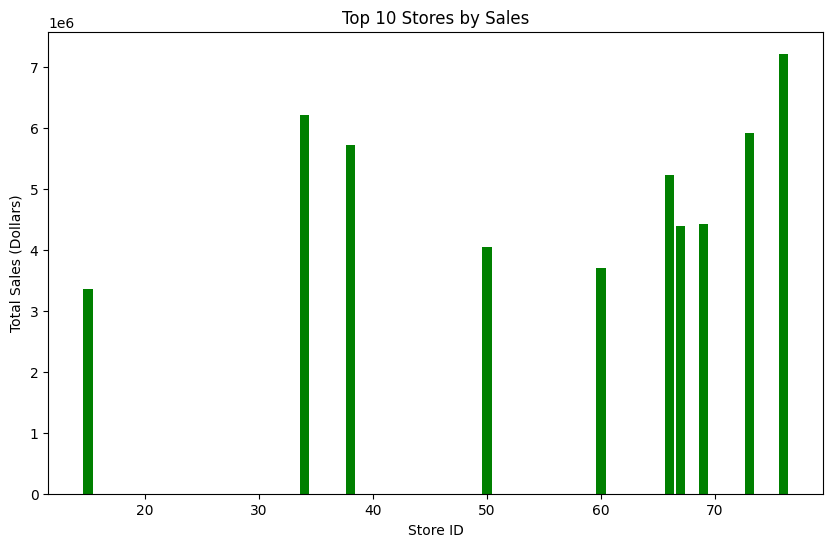

In [9]:
# 매장별 매출액 합계 계산
store_sales = df.groupby('Store').agg({'Dollars': 'sum'}).reset_index()

# 상위 10개 매장 시각화
top_10_stores = store_sales.sort_values(by='Dollars', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_10_stores['Store'], top_10_stores['Dollars'], color='green')
plt.xlabel('Store ID')
plt.ylabel('Total Sales (Dollars)')
plt.title('Top 10 Stores by Sales')
plt.show()

## 3. 가격과 매출의 상관관계 분석

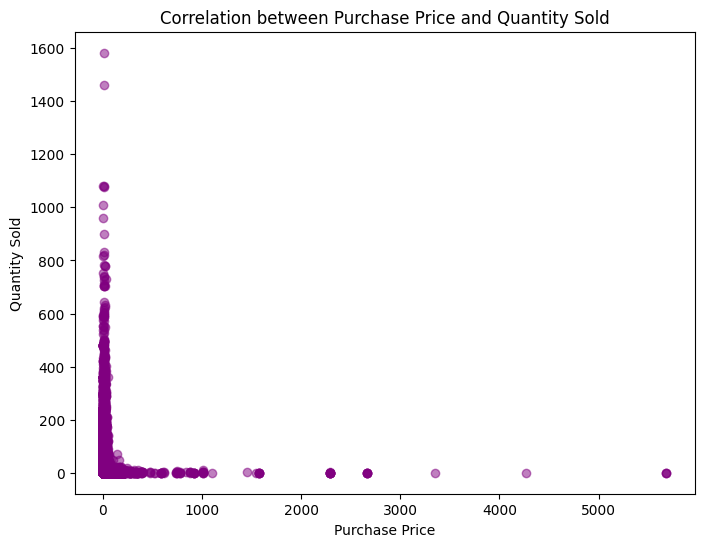

In [11]:
# 가격과 판매량 간의 상관관계 분석
plt.figure(figsize=(8, 6))
plt.scatter(df['PurchasePrice'], df['Quantity'], alpha=0.5, color='purple')
plt.xlabel('Purchase Price')
plt.ylabel('Quantity Sold')
plt.title('Correlation between Purchase Price and Quantity Sold')
plt.show()

## 4. 시즌별 판매 추이 분석

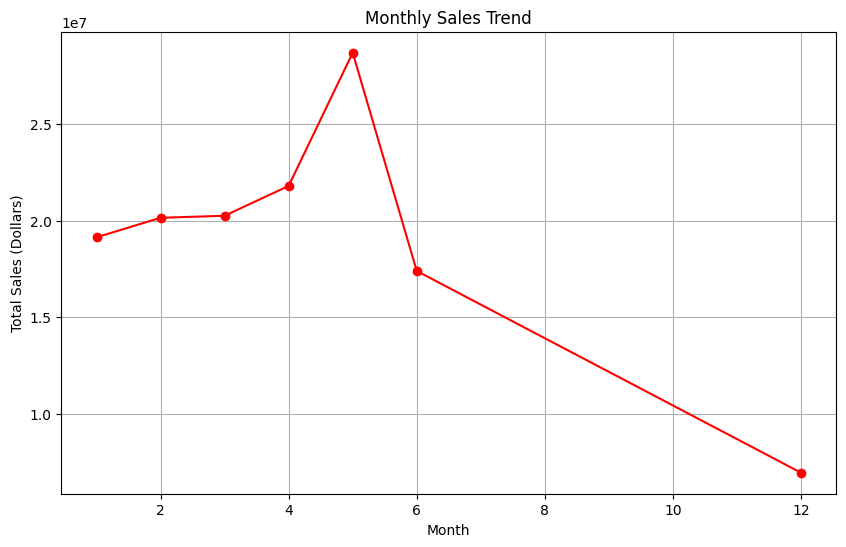

In [12]:
# PODate를 datetime 형식으로 변환 후 월별 매출 합계 계산
df['PODate'] = pd.to_datetime(df['PODate'])
df['Month'] = df['PODate'].dt.month
monthly_sales = df.groupby('Month').agg({'Dollars': 'sum'}).reset_index()

# 월별 매출 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Dollars'], marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales (Dollars)')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

## 